In [14]:
import torch
import torchvision
from torchsummary import summary
from torchvision.models.vgg import vgg16
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
model = vgg16(pretrained=False)


summary(model,(3,224, 224))

c:\Users\hoang\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hoang\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

# Visualize filters

## See network conv layer info

In [13]:
for layer in model.features:
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        # Expected: [out_channels, in_channels/ groups, kernel_size[0], kernel_size[1]]
        print(f"{type(layer)}: {layer.weight.shape}")

<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([64, 3, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([64, 64, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([128, 64, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([128, 128, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([256, 128, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([256, 256, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([256, 256, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 256, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])


In [8]:
filters = model.features[0].weight

In [11]:
f_min, f_max = filters.min(), filters.max()
f_min, f_max

(tensor(-0.2136, grad_fn=<MinBackward1>),
 tensor(0.2068, grad_fn=<MaxBackward1>))

In [12]:
filters = (filters - f_min) / (f_max - f_min)

## Visualize 6 filters of 64 filters in first conv layer

In [23]:
filters[1, :, :, :]

tensor([[[0.4341, 0.4699, 0.3370],
         [0.3785, 0.5232, 0.6779],
         [0.2880, 0.5704, 0.5272]],

        [[0.5893, 0.4649, 0.8367],
         [0.3918, 0.6100, 0.5945],
         [0.6224, 0.3004, 0.4591]],

        [[0.2451, 0.4387, 0.7251],
         [0.8092, 0.7080, 0.6209],
         [0.6738, 0.3230, 0.5855]]], grad_fn=<SliceBackward0>)

In [21]:
filters[1, :, :, :].detach().numpy()

array([[[0.43414724, 0.46993592, 0.33703482],
        [0.37846366, 0.5232472 , 0.67787534],
        [0.2880041 , 0.5704007 , 0.52717894]],

       [[0.5892953 , 0.46486336, 0.836672  ],
        [0.3917931 , 0.60995895, 0.5944852 ],
        [0.62240744, 0.30039832, 0.45913073]],

       [[0.24508949, 0.43873158, 0.7251381 ],
        [0.80920064, 0.70800215, 0.62092906],
        [0.67378104, 0.32304278, 0.5855075 ]]], dtype=float32)

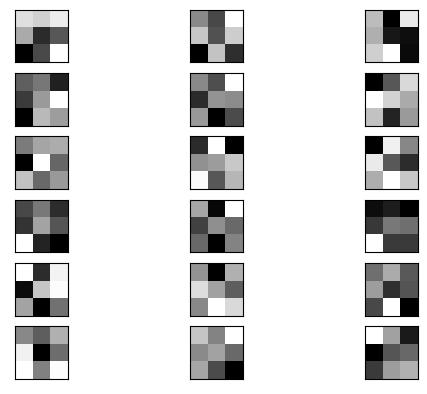

In [29]:
n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[i, :, :, :].detach().numpy()
    
    # Plot each channel separately
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Plot filter channel in gray scale
        plt.imshow(f[j, :, :], cmap='gray')
        ix +=1
        
plt.show()

# Visualize feature maps